Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 4x1 matrix but right is a 4x1 matrix


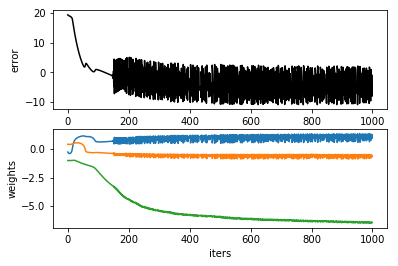

In [15]:
import numpy as np
import pyCalc as p
import random
p.setMode("quiet")
xs = p.var("constant",np.array([
                                   [5,0,0],
                                   [1,5,0],
                                   [1,0,5],
                                   [5,1,1]
                               ]
                               , dtype= float))
ys = p.var("constant", np.array(
                                [17,3,-6,5]
                                , dtype=float))
np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", 3,1)

l0 = p.function(xs,ws, "*") #4x1
l1 = p.function(l0, "sigmoid") #4x1

weights2 =2*np.random.random((1,1)) - 1
ws2 = p.var("independent", 1,1)

l2 = p.function(l1,ws2, "*") #4x1
l2_error = p.function(ys.T(), l2, "-")



tmp2 = p.function(l1.T(),l2_error, "*")

sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l2_error, "colwise*")
l1_delta2 = p.function(xs.T(),l1_delta, "*")

tmp = p.function(l1_delta2,ws2, "*")

tmp.value(dict([(ws,weights), (ws2, weights2)]))
g= []
h = []
for i in range(1000):
    t0 = weights + 0.01*tmp.value(dict([(ws,weights), (ws2, weights2)]))
    t1 = weights2 + 0.01*tmp2.value(dict([(ws,weights), (ws2, weights2)]))
    weights = t0
    weights2 = t1
    g.append(np.sum(l2_error.value(dict([(ws,weights), (ws2, weights2)]))))
    h.append(weights.tolist())


import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[h[i][j] for i in range(len(h))] for j in range(len(h[0]))]
plt.figure(1)
plt.subplot(211)
plt.ylabel('error')
plt.xlabel('iters')
plt.plot(x_data, g, 'k')

plt.subplot(212)
plt.ylabel('weights')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.show()

In [16]:
weights2

array([[ 17.07909211]])

In [17]:
l2_error.value(dict([(ws,weights), (ws2, weights2)]))

array([[ 0.05393164],
       [ 1.49652011],
       [-6.        ],
       [ 3.41610814]])

In [18]:
l1.value(dict([(ws,weights), (ws2, weights2)]))

array([[  9.92211310e-01],
       [  8.80304341e-02],
       [  2.39522521e-14],
       [  9.27386451e-02]])

In [19]:
l2.value(dict([(ws,weights), (ws2, weights2)]))

array([[  1.69460684e+01],
       [  1.50347989e+00],
       [  4.09082720e-13],
       [  1.58389186e+00]])

In [27]:
xs = p.var("constant",np.array([
                                   [5,0,0],
                                   [1,5,0],
                                   [1,0,5],
                                   [5,1,1]
                               ]
                               , dtype= float))
ys = p.var("constant", np.array(
                                [17,3,-6,5]
                                , dtype=float))
ys.value()

array([[ 17.,   3.,  -6.,   5.]])

Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 100x1 matrix but right is a 100x1 matrix


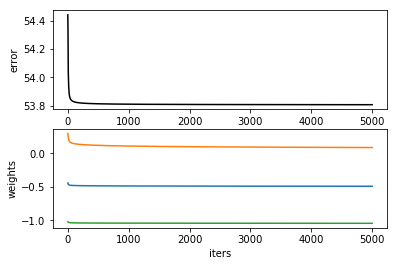

In [80]:
from math import exp
import numpy as np
import pyCalc as p
import random
p.setMode("quiet")
xxx = [[random.randint(1,101),random.randint(1,101),random.randint(1,101)] for x in range(100)]
xs = p.var("constant",np.array(xxx
                               , dtype= float))

yy = [3*(1/(1+exp(-2*d[0]+3*d[1]+d[2]))) for d in xxx]
ys = p.var("constant",np.array(yy
                               , dtype= float))

np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", 3,1)

l0 = p.function(xs,ws, "*") #4x1
l1 = p.function(l0, "sigmoid") #4x1

weights2 =2*np.random.random((1,1)) - 1
ws2 = p.var("independent", 1,1)

l2 = p.function(l1,ws2, "*") #4x1
l2_error = p.function(ys.T(), l2, "-")



tmp2 = p.function(l1.T(),l2_error, "*")

sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l2_error, "colwise*")
l1_delta2 = p.function(xs.T(),l1_delta, "*")

tmp = p.function(l1_delta2,ws2, "*")

tmp.value(dict([(ws,weights), (ws2, weights2)]))
g= []
h = []
for i in range(5000):
    t0 = weights + 0.01*tmp.value(dict([(ws,weights), (ws2, weights2)]))
    t1 = weights2 + 0.01*tmp2.value(dict([(ws,weights), (ws2, weights2)]))
    weights = t0
    weights2 = t1
    g.append(np.sum(l2_error.value(dict([(ws,weights), (ws2, weights2)]))))
    h.append(weights.tolist())


import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[h[i][j] for i in range(len(h))] for j in range(len(h[0]))]
plt.figure(1)
plt.subplot(211)
plt.ylabel('error')
plt.xlabel('iters')
plt.plot(x_data, g, 'k')

plt.subplot(212)
plt.ylabel('weights')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.show()

In [81]:
weights

array([[-0.49173756],
       [ 0.08367581],
       [-1.04233992]])

In [82]:
l2_error.value(dict([(ws,weights), (ws2, weights2)]))

array([[  4.81897329e-53],
       [  3.04980696e-19],
       [  6.10146124e-16],
       [  2.75528736e-03],
       [  1.54992619e-54],
       [  1.10899940e-41],
       [  1.95769533e-49],
       [  6.21242728e-37],
       [  1.00496062e-26],
       [  3.00000000e+00],
       [  9.04549355e-40],
       [  7.02233608e-54],
       [  3.79312709e-49],
       [  7.29852674e-25],
       [  5.87081453e-25],
       [  2.99999988e+00],
       [  3.93590449e-50],
       [  1.39766584e-14],
       [  1.11083611e-30],
       [  2.49817073e-50],
       [  1.22478095e-38],
       [  5.63858645e-12],
       [  1.49180893e-08],
       [  5.55638411e-45],
       [  3.00000000e+00],
       [  5.31233577e-27],
       [  1.99073036e-37],
       [  6.95970806e-22],
       [  3.00000000e+00],
       [  1.16219929e-20],
       [  1.81638057e-38],
       [  4.64662815e-44],
       [  4.26934407e-21],
       [  2.13129895e-34],
       [  1.89453049e-22],
       [  2.88723894e-40],
       [  3.00000000e+00],
 